# Personal Project #2 - Data Cleaning Fire Statistics Mexico for 2020
By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) 

In this guided project, I'll clean an update dataset from the Mexican National Comision of Bonds and Insurances. 

The datasets contains information about all the fires events for insured clients and their quantities.

The main data dictionary is as follows:

* `AÑO`: Year in which the Fire occured.
* `FORMA DE VENTA`: Type of sale.
* `GIRO`: Business type.
* `NUMERO DE NIVELES`: Building height in floors.
* `ENTIDAD`: Mexican State.
* `CAUSA DEL SINIESTRO`: Determined cause. 
* `Degrees`: Count of 17 columns for each degree category.

## 1.- Import NumPy, pandas and Matplotlib libraries.

Use pandas to import data from the datasets. Review which encoding is better.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("46 Informacion estadistica de Incendio_ Siniestros.csv", encoding='Latin1', low_memory = False)

In [4]:
data.head()

,AÑO,MONEDA,FORMA DE VENTA,GIRO,NUMERO DE NIVELES,TIPO PRIMER RIESGO,ENTIDAD,SUBTIPO DE SEGURO,TIPO DE BIEN,COBERTURA,CAUSA DEL SINIESTRO,NUMERO DE SINIESTROS,MONTO DE SINIESTRO,GASTO DE AJUSTE,SALVAMENTO,MONTO PAGADO,MONTO DE DEDUCIBLE,MONTO COASEGURO
0,2015,Extranjera,Agentes Persona Fisica,"Alquiler de maquinaria y equipo industrial, co...",2,NINGUNO,Baja California,Otro,Contenidos,"Incendio, rayo y explosion",Falta de Mantenimiento,1,49946,0,0,50306,15300,0
1,2015,Extranjera,Agentes Persona Fisica,Autotransporte de carga general,1,RELATIVO,Guanajuato,Otro,Edificio,"Incendio, rayo y explosion",Rayo,2,85736,2969,0,0,0,0
2,2015,Extranjera,Agentes Persona Fisica,Banca multiple,1,NINGUNO,Estado de Mexico,Microseguro,Contenidos,Extension de cubierta (sin inundacion),Impacto De Vehiculos,1,0,3626,0,0,0,0
3,2015,Extranjera,Agentes Persona Fisica,Banca multiple,1,NINGUNO,Nuevo Leon,Microseguro,Contenidos,Extension de cubierta (sin inundacion),"Rotura de techos, vidrios, paredes",1,-278,1813,0,0,0,0
4,2015,Extranjera,Agentes Persona Fisica,Banca multiple,1,NINGUNO,Distrito Federal,Microseguro,Contenidos,Extension de cubierta (sin inundacion),Roturas de tuberias o sistemas de agua,1,-1188,3626,0,0,0,0


# 2.- Delete columns.
Drop the following columns: ["FORMA DE VENTA", "SUBTIPO DE SEGURO", "SALVAMENTO", "MONTO PAGADO", "MONTO DE DEDUCIBLE", "MONTO DE COASEGURO"]

In [5]:
data["TIPO PRIMER RIESGO"].unique()

array(['NINGUNO', 'RELATIVO', 'ABSOLUTO', 'No Disponible',
       'No disponible', 'Ninguno', 'Absoluto', 'Relativo'], dtype=object)

In [6]:
newdata = data.drop(columns=["MONEDA", "FORMA DE VENTA","TIPO PRIMER RIESGO", "SUBTIPO DE SEGURO", "COBERTURA", "GASTO DE AJUSTE", "SALVAMENTO", "MONTO DE DEDUCIBLE", "MONTO COASEGURO"])

In [7]:
newdata.head()

,AÑO,GIRO,NUMERO DE NIVELES,ENTIDAD,TIPO DE BIEN,CAUSA DEL SINIESTRO,NUMERO DE SINIESTROS,MONTO DE SINIESTRO,MONTO PAGADO
0,2015,"Alquiler de maquinaria y equipo industrial, co...",2,Baja California,Contenidos,Falta de Mantenimiento,1,49946,50306
1,2015,Autotransporte de carga general,1,Guanajuato,Edificio,Rayo,2,85736,0
2,2015,Banca multiple,1,Estado de Mexico,Contenidos,Impacto De Vehiculos,1,0,0
3,2015,Banca multiple,1,Nuevo Leon,Contenidos,"Rotura de techos, vidrios, paredes",1,-278,0
4,2015,Banca multiple,1,Distrito Federal,Contenidos,Roturas de tuberias o sistemas de agua,1,-1188,0


In [8]:
newdata.isna().sum()

AÑO                     0
GIRO                    0
NUMERO DE NIVELES       0
ENTIDAD                 0
TIPO DE BIEN            0
CAUSA DEL SINIESTRO     0
NUMERO DE SINIESTROS    0
MONTO DE SINIESTRO      0
MONTO PAGADO            0
dtype: int64

In [9]:
newdata.dtypes

AÑO                      int64
GIRO                    object
NUMERO DE NIVELES       object
ENTIDAD                 object
TIPO DE BIEN            object
CAUSA DEL SINIESTRO     object
NUMERO DE SINIESTROS     int64
MONTO DE SINIESTRO       int64
MONTO PAGADO             int64
dtype: object

# 3.- Clean row data.
Agregate data for "TIPO DE BIEN", "CAUSA DEL SINIESTRO" and drop categories from "GIRO".

In [10]:
newdata["ENTIDAD"] = newdata["ENTIDAD"].str.title() 

In [11]:
newdata.drop(newdata[newdata["ENTIDAD"]=="En El Extranjero"].index, inplace= True)

In [12]:
newdata.drop(newdata[newdata["ENTIDAD"]=="Extranjero"].index, inplace= True)

In [13]:
newdata["ENTIDAD"].value_counts()

Distrito Federal       10911
Nuevo Leon              5852
Jalisco                 3950
Mexico                  2634
Baja California         2627
Estado De Mexico        2407
Sonora                  2360
Chihuahua               2064
Veracruz                1802
Guanajuato              1671
Coahuila                1624
Quintana Roo            1561
Sinaloa                 1387
Puebla                  1316
Queretaro               1288
Tamaulipas              1218
Morelos                  907
Tabasco                  894
Guerrero                 874
Yucatan                  868
Aguascalientes           802
Baja California Sur      799
Michoacan                644
Chiapas                  627
Oaxaca                   563
San Luis Potosi          562
Nayarit                  541
Hidalgo                  474
Durango                  465
Colima                   408
Campeche                 214
Tlaxcala                 177
Zacatecas                168
Name: ENTIDAD, dtype: int64

In [14]:
newdata["TIPO DE BIEN"].value_counts()

Edificio                                                  27514
Contenidos                                                19344
Perdidas Consecuenciales                                   3935
Contenidos y Edificio                                      3272
Existencias / Bienes Bajo Convenio Expreso                  159
Edificio y Perdidas Consecuenciales                         136
Otra combinacion / Otros                                     84
Edificio y Perdidas Consecuenc                               77
Contenidos y Perdidas Consecuenciales                        57
Contenidos y Perdidas Consecue                               39
Existencias / Bienes Bajo Conv                               25
Contenidos, Existencias / Bienes Bajo Convenio Expreso       12
Contenidos y Existencias                                      5
Name: TIPO DE BIEN, dtype: int64

## Will group as follows: "Contenidos", "Edificio", "Ambos".

In [15]:
mapdict = {'Edificio': 'Edificio', 'Contenidos': 'Contenidos','Perdidas Consecuenciales': "Ambos u Otros",
 'Contenidos y Edificio': "Ambos u Otros",
 'Existencias / Bienes Bajo Conv': "Ambos u Otros",
 'Contenidos y Perdidas Consecue': "Ambos u Otros",
 'Edificio y Perdidas Consecuenc': "Ambos u Otros",
 'Contenidos y Existencias': "Ambos u Otros",
 'Otra combinacion / Otros': "Ambos u Otros",
 'Edificio y Perdidas Consecuenciales': "Ambos u Otros",
 'Contenidos y Perdidas Consecuenciales': "Ambos u Otros",
 'Contenidos, Existencias / Bienes Bajo Convenio Expreso': "Ambos u Otros",
 'Existencias / Bienes Bajo Convenio Expreso': "Ambos u Otros"}

In [16]:
newdata["TIPO DE BIEN"].replace(mapdict, inplace=True)

In [17]:
newdata["TIPO DE BIEN"].value_counts()

Edificio         27514
Contenidos       19344
Ambos u Otros     7801
Name: TIPO DE BIEN, dtype: int64

In [18]:
newdata["CAUSA DEL SINIESTRO"].value_counts()

Rayo                                                               7412
Roturas de tuberias o sistemas de agua                             5521
Corto circuito / Electricidad                                      5470
Incendio por Lluvia                                                4450
Accion del Agua que no Provenga de las Condiciones Atmosfericas    3625
                                                                   ... 
Conmocion Civil                                                       9
Derrame De Material Fundido                                           4
Guerra                                                                3
Fermentacion                                                          3
Perdida de equipaje durante el viaje                                  2
Name: CAUSA DEL SINIESTRO, Length: 63, dtype: int64

## Will use string methods to clean values and group.

In [19]:
newdata["CAUSA DEL SINIESTRO"] = newdata["CAUSA DEL SINIESTRO"].str.title()

In [20]:
mapdict = newdata["CAUSA DEL SINIESTRO"].value_counts().sort_index().to_dict()

In [21]:
mapdict

{'Accion Del Agua Que No Provenga De Las Condiciones': 1386,
 'Accion Del Agua Que No Provenga De Las Condiciones Atmosfericas': 3625,
 'Actos De Personas Mal Intencionadas': 3011,
 'Auto Ignicion': 587,
 'Caida De Antenas': 73,
 'Caida De Arboles': 769,
 'Caida De Avion': 195,
 'Caida De Maquinaria O Sus Partes Por Rotura De Cab': 38,
 'Caida De Maquinaria O Sus Partes Por Rotura De Cables': 2298,
 'Caida De Nave Aerea Y Objetos Caidos De Ellos': 67,
 'Cerillos Y Cigarros': 99,
 'Combustion Espontanea': 108,
 'Conmocion Civil': 9,
 'Contenidos E Interior De Los Edificios Por Deficie': 76,
 'Contenidos E Interior De Los Edificios Por Deficiencias En Construccion': 452,
 'Corrosion En Tuberia': 73,
 'Corto Circuito / Electricidad': 5470,
 'Daños Causados Por Impericia De Trabajo': 907,
 'Daños En Coladeras': 24,
 'Daños Por Derrame De Sustancias Quimicas': 49,
 'Derrame De Equipo Contra Incendio': 67,
 'Derrame De Material Fundido': 30,
 'Desbordamiento O Desviacion De Corrientes O Depo

In [22]:
mapdict = {'Accion Del Agua Que No Provenga De Las Condiciones': 'Agua No Atmosferica',
 'Accion Del Agua Que No Provenga De Las Condiciones Atmosfericas': 'Agua No Atmosferica',
 'Actos De Personas Mal Intencionadas': "Incendio Provocado",
 'Auto Ignicion': "Ignicion Esponteanea",
 'Caida De Antenas': "Caida De Antena",
 'Caida De Arboles': "Caida De Arbol",
 'Caida De Avion': "Caida De Avion",
 'Caida De Maquinaria O Sus Partes Por Rotura De Cab': "Caida De Maquinaria",
 'Caida De Maquinaria O Sus Partes Por Rotura De Cables': "Caida De Maquinaria",
 'Caida De Nave Aerea Y Objetos Caidos De Ellos': "Caida de Avion",
 'Cerillos Y Cigarros': "Cerillos y Cigarros",
 'Combustion Espontanea': "Ignicion Esponteanea",
 'Conmocion Civil': "Otros",
 'Contenidos E Interior De Los Edificios Por Deficie': "Deficiente Construccion",
 'Contenidos E Interior De Los Edificios Por Deficiencias En Construccion': "Deficiente Construccion",
 'Corrosion En Tuberia': "Otros",
 'Corto Circuito / Electricidad': "Corto Electrico",
 'Daños Causados Por Impericia De Trabajo': "Error Humano",
 'Daños En Coladeras': "Otro",
 'Daños Por Derrame De Sustancias Quimicas': "Otro",
 'Derrame De Equipo Contra Incendio': "Otro",
 'Derrame De Material Fundido': "Otro",
 'Desbordamiento O Desviacion De Corrientes O Deposi': "Agua No Atmosferica",
 'Desbordamiento O Desviacion De Corrientes O Depositos Artificiales': "Agua No Atmosferica",
 'Descargas Accidentales De Agua O Vapor': "Agua No Atmosferica",
 'Desechos Organicos': "Otro",
 'Durante La Soldadura Y Corte': "Error Humano",
 'Escape De Materias Inflamables O Explosivas': "Explosion",
 'Explosion': "Explosion",
 'Fallas En El Sistema De Refrigeracion': "Otro",
 'Falta De Mantenimiento': "Falta De Mantenimiento",
 'Falta De Suministro De Energia Electrica': "Falta de Energia Electrica",
 'Falta O Insuficiencia De Drenaje': "Otro",
 'Fenomenos De La Naturaleza': "Fenomeno De La Naturaleza",
 'Fermentacion': "Otro",
 'Friccion': "Otro",
 'Gastos Extraordinarios': "Otro",
 'Guerra': "Otro",
 'Huelgas, Alborotos Populares': "Vandalismo",
 'Humo O Tizne': "Otro",
 'Impacto De Vehiculos': "Impacto de Vehiculos",
 'Incendio Por Lluvia': "Lluvia",
 'Material Sobrecalentado': "Otro",
 'Otra Causa': "Otro",
 'Perdida De Equipaje Durante El Viaje': "Otro",
 'Perdida De Equpaje Durante Viaje': "Otro",
 'Plaga De Termitas': "Plaga",
 'Rayo': "Rayo",
 'Remocion De Escombros': "Error Humano",
 'Rotura De Techos, Vidrios, Paredes': "Rotura de Techo, Vidios o Paredes",
 'Roturas De Tuberias O Sistemas De Agua': "Rotura de Tuberias de Agua",
 'Vientos Tempestuosos': "Fenomeno De La Naturaleza"}

In [23]:
newdata["CAUSA DEL SINIESTRO"].replace(mapdict, inplace=True)

In [24]:
newdata["CAUSA DEL SINIESTRO"].value_counts()

Rayo                                 7412
Agua No Atmosferica                  5926
Rotura de Tuberias de Agua           5521
Corto Electrico                      5470
Lluvia                               4450
Explosion                            4030
Impacto de Vehiculos                 3137
Incendio Provocado                   3011
Fenomeno De La Naturaleza            2889
Falta De Mantenimiento               2661
Caida De Maquinaria                  2336
Otro                                 1718
Error Humano                         1500
Rotura de Techo, Vidios o Paredes    1208
Caida De Arbol                        769
Ignicion Esponteanea                  695
Vandalismo                            681
Deficiente Construccion               528
Caida De Avion                        195
Falta de Energia Electrica            140
Cerillos y Cigarros                    99
Otros                                  82
Caida De Antena                        73
Caida de Avion                    

In [25]:
mapdict = newdata["CAUSA DEL SINIESTRO"].value_counts().sort_index().to_dict()
mapdict

{'Agua No Atmosferica': 5926,
 'Caida De Antena': 73,
 'Caida De Arbol': 769,
 'Caida De Avion': 195,
 'Caida De Maquinaria': 2336,
 'Caida de Avion': 67,
 'Cerillos y Cigarros': 99,
 'Corto Electrico': 5470,
 'Deficiente Construccion': 528,
 'Error Humano': 1500,
 'Explosion': 4030,
 'Falta De Mantenimiento': 2661,
 'Falta de Energia Electrica': 140,
 'Fenomeno De La Naturaleza': 2889,
 'Ignicion Esponteanea': 695,
 'Impacto de Vehiculos': 3137,
 'Incendio Provocado': 3011,
 'Lluvia': 4450,
 'Otro': 1718,
 'Otros': 82,
 'Plaga': 61,
 'Rayo': 7412,
 'Rotura de Techo, Vidios o Paredes': 1208,
 'Rotura de Tuberias de Agua': 5521,
 'Vandalismo': 681}

In [26]:
mapdict = {'Agua No Atmosferica': "Agua-No Atmosferica",
 'Caida De Antena': "Caida-Antena",
 'Caida De Arbol': "Caida-Arbol",
 'Caida De Avion': "Caida-Avion",
 'Caida De Maquinaria': "Caida-Maquinaria",
 'Caida de Avion': "Caida-Avion",
 'Cerillos y Cigarros': "Humano-Fumar",
 'Corto Electrico': "Incidente-Corto Electrico",
 'Deficiente Construccion': "Incidente-Construccion Deficiente",
 'Error Humano': "Humano-Error",
 'Explosion': "Incidente-Explosion",
 'Falta De Mantenimiento': "Humano-Falta de Mantenimiento",
 'Falta de Energia Electrica': "Incidente-Falta de Energia",
 'Fenomeno De La Naturaleza': "Naturaleza-Fenomeno",
 'Ignicion Esponteanea': "Incidente-Ignicion Espontanea",
 'Impacto de Vehiculos': "Humano-Impacto Vehicular",
 'Incendio Provocado': "Humano-Incendio Provocado",
 'Lluvia': "Agua-Lluvia",
 'Otro': "Otro-Otro",
 'Otros': "Otro-Otro",
 'Plaga': "Naturaleza-Plaga",
 'Rayo': "Naturaleza-Rayo",
 'Rotura de Techo, Vidios o Paredes': "Incidente-Rotura de Techo, Vidrios o Paredes",
 'Rotura de Tuberias de Agua': "Agua-Tuberia Rota",
 'Vandalismo': "Humano-Vandalismo"}

In [27]:
newdata["CAUSA DEL SINIESTRO"].replace(mapdict, inplace=True)

In [28]:
newdata["CAUSA DEL SINIESTRO"].value_counts().sort_index()

Agua-Lluvia                                     4450
Agua-No Atmosferica                             5926
Agua-Tuberia Rota                               5521
Caida-Antena                                      73
Caida-Arbol                                      769
Caida-Avion                                      262
Caida-Maquinaria                                2336
Humano-Error                                    1500
Humano-Falta de Mantenimiento                   2661
Humano-Fumar                                      99
Humano-Impacto Vehicular                        3137
Humano-Incendio Provocado                       3011
Humano-Vandalismo                                681
Incidente-Construccion Deficiente                528
Incidente-Corto Electrico                       5470
Incidente-Explosion                             4030
Incidente-Falta de Energia                       140
Incidente-Ignicion Espontanea                    695
Incidente-Rotura de Techo, Vidrios o Paredes  

## Giro has a lot of different values, I will drop categories with small frequencies.

In [29]:
newdata["GIRO"] = newdata["GIRO"].str.title()

In [30]:
newdata["GIRO"].unique()

array(['Alquiler De Maquinaria Y Equipo Industrial, Comercial Y De Servic',
       'Autotransporte De Carga General', 'Banca Multiple',
       'Captacion, Tratamiento Y Suministro De Agua', 'Casa Habitacion',
       'Casa Habitacion Propia',
       'Casinos, Loterias Y Otros Juegos De Azar',
       'Centros Nocturnos, Bares, Cantinas Y Similares',
       'Comercio Al Por Mayor De Alimentos Y Abarrotes',
       'Comercio Al Por Mayor De Articulos De Papeleria, Libros, Revistas',
       'Comercio Al Por Mayor De Articulos De Perfumeria, Joyeria Y Otros',
       'Comercio Al Por Mayor De Discos, Juguetes Y Articulos Deportivos',
       'Comercio Al Por Mayor De Electrodomesticos Menores Y Aparatos D',
       'Comercio Al Por Mayor De Maquinaria Y Equipo Agropecuario, Fores',
       'Comercio Al Por Mayor De Maquinaria Y Equipo Para La Industria',
       'Comercio Al Por Mayor De Materiales De Desecho',
       'Comercio Al Por Mayor De Materias Primas Para La Industria',
       'Comercio A

In [31]:
newdata["GIRO"].value_counts().shape

(588,)

In [32]:
counts = newdata["GIRO"].value_counts()
#This line of code will filter out any category with a frequency of less than or equal to 55.
dirtydata = newdata[~newdata["GIRO"].isin(counts[counts <= 25].index)]
dirtydata["GIRO"].value_counts()

Casa Habitaciòn                                                                                                                                             8946
Vivienda (Casa Habitaciòn)                                                                                                                                  4291
Casa Habitacion                                                                                                                                             4002
Oficinas Publicas                                                                                                                                           2418
Oficinas Privadas                                                                                                                                           1416
                                                                                                                                                            ... 
Comercio Al Por Mayor De Materias 

In [33]:
x = dirtydata.shape[0]
x

51428

In [34]:
y = newdata.shape[0]
y

54659

In [35]:
z = y - x
z

3231

In [36]:
per = z / y * 100
per

5.911194862694159

Since 2020, I always try to keep the amount of dropped data below 5%. I can live with 5.91% since this is just a personal proyect.

In [37]:
mapdict = dirtydata["GIRO"].value_counts().sort_index().to_dict()
mapdict

{'Actividades Del Gobierno Y De Organismos Internacionales Y Extraterritoriales (Administracion Publica En General)': 231,
 'Administracion Publica En General': 673,
 'Alquiler Sin Intermediacion De Viviendas Y Otros Inmuebles': 38,
 'Banca Multiple': 501,
 'Captacion, Tratamiento Y Suministro De Agua': 55,
 'Casa Habitacion': 4002,
 'Casa Habitacion (Credito Hipotecario)': 473,
 'Casa Habitacion Propia': 265,
 'Casa Habitaciòn': 8946,
 'Casa Habitaciòn (Credito Hipotecario)': 1189,
 'Casa Habitaciòn Propia': 592,
 'Casa Habitaciòn Rentada': 56,
 'Centros Nocturnos, Bares, Cantinas Y Similares': 268,
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Alimentos Y Abarrotes)': 233,
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Materias Primas Para La Industria)': 55,
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Productos Farmaceuticos)': 50,
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Productos Textiles Y Calzado)': 30,
 'Comercio Al Por Mayor De Alimentos Y Abarrotes': 689

In [38]:
mapdict = {'Actividades Del Gobierno Y De Organismos Internacionales Y Extraterritoriales (Administracion Publica En General)': "Oficinas",
 'Administracion Publica En General': "Oficinas",
 'Alquiler Sin Intermediacion De Viviendas Y Otros Inmuebles': "Casa",
 'Banca Multiple': 'Bancos',
 'Captacion, Tratamiento Y Suministro De Agua': 'Infraestructura Agua',
 'Casa Habitacion': "Casa",
 'Casa Habitacion (Credito Hipotecario)': "Casa",
 'Casa Habitacion Propia': "Casa",
 'Casa Habitaciòn': "Casa",
 'Casa Habitaciòn (Credito Hipotecario)': "Casa",
 'Casa Habitaciòn Propia': "Casa",
 'Casa Habitaciòn Rentada': "Casa",
 'Centros Nocturnos, Bares, Cantinas Y Similares': 'Bares',
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Alimentos Y Abarrotes)': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Materias Primas Para La Industria)': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Productos Farmaceuticos)': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor (Comercio Al Por Mayor De Productos Textiles Y Calzado)': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Alimentos Y Abarrotes': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Articulos De Papeleria, Libros, Revistas Y Periodicos': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Articulos De Perfumeria, Joyeria Y Otros Accesorios De Vestir': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Bebidas Y Tabaco': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Camiones': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Discos, Juguetes Y Articulos Deportivos': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Electrodomesticos Menores Y Aparatos De Linea Blanca': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Maquinaria Y Equipo Para La Industria': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Maquinaria Y Equipo Para Los Servicios Y Para Actividades Comerciales': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Maquinaria, Mobiliario Y Equipo De Uso General': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Materias Primas Agropecuarias': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Materias Primas Para La Industria': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Productos Farmaceuticos': "Comercio Al Por Mayor",
 'Comercio Al Por Mayor De Productos Textiles Y Calzado': "Comercio Al Por Mayor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Alimentos)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Articulos De Ferreteria, Tlapaleria Y Vidrios)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Articulos Para El Cuidado De La Salud)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Automoviles Y Camionetas)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Calzado)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Combustibles, Aceites Y Grasas Lubricantes)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Mascotas, Regalos, Articulos Religiosos, Artesanias, Articulos En Tiendas Importadoras Y Otros Articulos De Uso Personal)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Muebles Para El Hogar Y Otros Enseres Domesticos)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Partes Y Refacciones Para Automoviles, Camionetas Y Camiones)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Productos Textiles, Excepto Ropa)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor De Ropa Y Accesorios De Vestir)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor En Tiendas De Autoservicio)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Comercio Al Por Menor En Tiendas Departamentales)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Intermediacion Al Por Menor)': "Comercio Al Por Menor",
 'Comercio Al Por Menor (Otro Producto Al Comercio Al Por Menor)': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Alimentos': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos De Ferreteria, Tlapaleria Y Vi': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos De Ferreteria, Tlapaleria Y Vidrios': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos De Papeleria, Libros Y Perio': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos De Papeleria, Libros Y Periodicos': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos De Perfumeria Y Joyeria': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos Para El Cuidado De La Salud': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos Para El Esparcimiento': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Articulos Para La Decoracion De Interiores': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Automoviles Y Camionetas': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Bebidas Y Tabaco': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Calzado': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Combustibles, Aceites Y Grasas Lubrica': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Combustibles, Aceites Y Grasas Lubricantes': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Computadoras, Telefonos Y Otros Aparatos De Comunicacion': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Mascotas, Regalos, Articulos Religiosos': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Mascotas, Regalos, Articulos Religiosos, Artesanias, Articulos En Tiendas Importadoras Y Otros Articulos De Uso Personal': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Muebles Para El Hogar Y Otros Enseres': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Muebles Para El Hogar Y Otros Enseres Domesticos': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Partes Y Refacciones Para Automoviles,': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Partes Y Refacciones Para Automoviles, Camionetas Y Camiones': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Productos Textiles, Excepto Ropa': "Comercio Al Por Menor",
 'Comercio Al Por Menor De Ropa Y Accesorios De Vestir': "Comercio Al Por Menor",
 'Comercio Al Por Menor En Tiendas De Autoservicio': "Comercio Al Por Menor",
 'Comercio Al Por Menor En Tiendas Departamentales': "Comercio Al Por Menor",
 'Compañias Y Grupos De Espectaculos Artisticos': 'Recreativo',
 'Confeccion De Alfombras, Blancos Y Similares': 'Fabrica',
 'Confeccion De Prendas De Vestir': 'Fabrica',
 'Conservacion De Frutas, Verduras Y Guisos': 'Fabrica',
 'Construccion (Edificacion Residencial (Construcciòn))': 'Casa',
 'Consultorios Medicos': 'Hospital',
 'Cultivo De Granos Y Semillas Oleaginosas': "Cultivo",
 'Deportistas Y Equipos Deportivos Profesionales Y Semiprofesionales': 'Deportes',
 'Edificacion Residencial (Construccion)': "Casa",
 'Edificacion Residencial (Construcciòn)': "Casa",
 'Elaboracion De Alimentos Para Animales': "Fabrica",
 'Elaboracion De Azucar, Chocolates, Dulces Y Similares': "Fabrica",
 'Elaboracion De Productos De Panaderia Y Tortillas': "Fabrica",
 'Elaboracion De Productos Lacteos': "Fabrica",
 'Escuelas De Educacion Basica, Media Y Especial': "Escuela",
 'Escuelas De Educacion Superior': "Escuela",
 'Estacionamientos Y Pensiones Para Automoviles': "Estacionamiento",
 'Explotacion Avicola': 'Animal',
 'Extraccion De Petroleo Y Gas': 'Gas',
 'Fabricacion De Aparatos Electricos De Uso Domestico': "Fabrica",
 'Fabricacion De Automoviles Y Camiones': "Fabrica",
 'Fabricacion De Calzado': "Fabrica",
 'Fabricacion De Celulosa, Papel Y Carton': "Fabrica",
 'Fabricacion De Cemento Y Productos De Concreto': "Fabrica",
 'Fabricacion De Componentes Electronicos': "Fabrica",
 'Fabricacion De Computadoras Y Equipo Periferico': "Fabrica",
 'Fabricacion De Fertilizantes, Pesticidas Y Otros Agroquimicos': "Fabrica",
 'Fabricacion De Hules, Resinas Y Fibras Quimicas': "Fabrica",
 'Fabricacion De Jabones, Limpiadores Y Preparaciones De Tocador': "Fabrica",
 'Fabricacion De Muebles, Excepto De Oficina Y Estanteria': "Fabrica",
 'Fabricacion De Otra Maquinaria Y Equipo Para La Industria En General': "Fabrica",
 'Fabricacion De Otros Equipos Y Accesorios Electricos': "Fabrica",
 'Fabricacion De Otros Productos De Madera': "Fabrica",
 'Fabricacion De Otros Productos Metalicos': "Fabrica",
 'Fabricacion De Otros Productos Quimicos': "Fabrica",
 'Fabricacion De Partes Para Vehiculos Automotores': "Fabrica",
 'Fabricacion De Pinturas, Recubrimientos, Adhesivos Y Selladores': "Fabrica",
 'Fabricacion De Productos De Hierro Y Acero De Material Comprado': "Fabrica",
 'Fabricacion De Productos De Hule': "Fabrica",
 'Fabricacion De Productos De Papel Y Carton': "Fabrica",
 'Fabricacion De Productos De Plastico': "Fabrica",
 'Fabricacion De Productos Derivados Del Petroleo Y Del Carbon': "Fabrica",
 'Fabricacion De Productos Farmaceuticos': "Fabrica",
 'Fabricacion De Productos Quimicos Basicos': "Fabrica",
 'Fabricacion De Telas': "Fabrica",
 'Fabricacion De Vidrio Y Productos De Vidrio': "Fabrica",
 'Generacion, Transmision Y Suministro De Energia Electrica': "Energia Electrica",
 'Hogares Con Empleados Domesticos': "Casa",
 'Hospitales Generales': "Hospital",
 'Hoteles, Moteles Y Similares': 'Hotel',
 'Impresion E Industrias Conexas': "Industria",
 'Industria Basica Del Hierro Y Del Acero': "Industria",
 'Industria De Las Bebidas': "Industria",
 'Industrias De Metales No Ferrosos, Excepto Aluminio': "Industria",
 'Industrias Manufactureras (Conservacion De Frutas, Verduras Y Guisos)': "Industria",
 'Industrias Manufactureras (Elaboracion De Alimentos Para Animales)': "Industria",
 'Industrias Manufactureras (Elaboracion De Azucar, Chocolates, Dulces Y Similares)': "Industria",
 'Industrias Manufactureras (Elaboracion De Productos De Panaderia Y Tortillas)': "Industria",
 'Industrias Manufactureras (Elaboracion De Productos Lacteos)': "Industria",
 'Industrias Manufactureras (Fabricacion De Automoviles Y Camiones)': "Industria",
 'Industrias Manufactureras (Fabricacion De Componentes Electronicos)': "Industria",
 'Industrias Manufactureras (Fabricacion De Otra Maquinaria Y Equipo Para La Industria En General)': "Industria",
 'Industrias Manufactureras (Fabricacion De Otros Productos Metalicos)': "Industria",
 'Industrias Manufactureras (Fabricacion De Partes Para Vehiculos Automotores)': "Industria",
 'Industrias Manufactureras (Fabricacion De Pinturas, Recubrimientos, Adhesivos Y Selladores)': "Industria",
 'Industrias Manufactureras (Fabricacion De Productos De Plastico)': "Industria",
 'Industrias Manufactureras (Fabricacion De Productos Derivados Del Petroleo Y Del Carbon)': "Industria",
 'Industrias Manufactureras (Fabricacion De Productos Farmaceuticos)': "Industria",
 'Industrias Manufactureras (Industria De Las Bebidas)': "Industria",
 'Industrias Manufactureras (Industrias De Metales No Ferrosos, Excepto Aluminio)': "Industria",
 'Industrias Manufactureras (Matanza, Empacado Y Procesamiento De Carne De Ganado Y Aves)': "Industria",
 'Industrias Manufactureras (Molienda De Granos Y De Semillas Oleaginosas)': "Industria",
 'Industrias Manufactureras (Otras Industrias Alimentarias)': "Industria",
 'Industrias Manufactureras (Otras Industrias Manufactureras)': "Industria",
 'Informacion En Medios Masivos (Transmision De Programas De Radio Y Television, Excepto A Traves De Internet)': "Industria",
 'Inmobiliarias Y Corredores De Bienes Raices': "Oficinas",
 'Intermediacion Al Por Mayor ': "Comercio Al Por Mayor",
 'Intermediacion Al Por Menor': "Comercio Al Por Menor",
 'Laboratorios Medicos Y De Diagnostico': 'Hospital',
 'Lavanderias Y Tintorerias': 'Servicios',
 'Manejo De Desechos Y Servicios De Remediacion': 'Servicios',
 'Matanza, Empacado Y Procesamiento De Carne De Ganado Y Aves': 'Animal',
 'Mineria (Extraccion De Petroleo Y Gas)': "Mina",
 'Mineria De Minerales Metalicos': "Mina",
 'Molienda De Granos Y De Semillas Oleaginosas': "Fabrica",
 'No Disponible': "No Disponible",
 'Oficina (Oficinas Privadas)': "Oficinas",
 'Oficina (Oficinas Publicas)': "Oficinas",
 'Oficina (Otro Tipo De Oficina)': "Oficinas",
 'Oficinas Privadas': "Oficinas",
 'Oficinas Publicas': "Oficinas",
 'Otras Construcciones De Ingenieria Civil U Obra Pesada': "Obra",
 'Otras Industrias Alimentarias': "Industria",
 'Otras Industrias Manufactureras': "Industria",
 'Otras Instituciones De Intermediacion Crediticia Y Financiera No Bursatil': "Bancos",
 'Otro Producto Al Comercio Al Por Menor': "Comercio Al Por Menor",
 'Otro Tipo De Casa Habitacion': "Casa",
 'Otro Tipo De Casa Habitaciòn': "Casa",
 'Otro Tipo De Oficina': "Oficinas",
 'Otros Servicios De Informacion': "Oficinas",
 'Otros Servicios Educativos': "Escuela",
 'Otros Servicios Excepto Actividades Del Gobierno (Estacionamientos Y Pensiones Para Automoviles)': "Estacionamiento",
 'Otros Servicios Excepto Actividades Del Gobierno (Hogares Con Empleados Domesticos)': "Casa",
 'Otros Servicios Excepto Actividades Del Gobierno (Lavanderias Y Tintorerias)': "Servicios",
 'Otros Servicios Excepto Actividades Del Gobierno (Reparacion Y Mantenimiento De Automoviles Y Camiones)': "Servicios",
 'Otros Servicios Excepto Actividades Del Gobierno (Salones Y Clinicas De Belleza, Baños Publicos Y Bolerias)': "Servicios",
 'Otros Servicios Profesionales, Cientificos Y Tecnicos': "Servicios",
 'Otros Servicios Recreativos': "Recreativo",
 'Parques Con Instalaciones Recreativas Y Casas De Juegos Electroni': "Recreativo",
 'Parques Con Instalaciones Recreativas Y Casas De Juegos Electronicos': "Recreativo",
 'Pensiones Y Casas De Huespedes, Y Departamentos Y Casas Amueblados Con Servicios De Hoteleria': "Hotel",
 'Preparacion E Hilado De Fibras Textiles Y Fabricacion De Hilos': "Fabrica",
 'Reparacion Y Mantenimiento De Automoviles Y Camiones': "Servicios",
 'Restaurantes Con Servicio De Meseros': "Restaurante",
 'Restaurantes De Autoservicio Y De Comida Para Llevar': "Restaurante",
 'Salones Y Clinicas De Belleza, Baños Publicos Y Bolerias': "Servicios",
 'Servicios De Almacenamiento': "Almacenaje",
 'Servicios De Alojamiento Temporal Y De Preparacion De Alimentos Y Bebidas (Centros Nocturnos, Bares, Cantinas Y Similares)': "Bares",
 'Servicios De Alojamiento Temporal Y De Preparacion De Alimentos Y Bebidas (Hoteles, Moteles Y Similares)': "Hotel",
 'Servicios De Alojamiento Temporal Y De Preparacion De Alimentos Y Bebidas (Pensiones Y Casas De Huespedes, Y Departamentos Y Casas Amueblados Con Servicios De Hoteleria)': "Casa",
 'Servicios De Alojamiento Temporal Y De Preparacion De Alimentos Y Bebidas (Restaurantes Con Servicio De Meseros)': "Restaurante",
 'Servicios De Alojamiento Temporal Y De Preparacion De Alimentos Y Bebidas (Servicios De Preparacion De Alimentos Por Encargo)': "Servicios",
 'Servicios De Alquiler De Marcas Registradas, Patentes Y Franquicias': "Oficinas",
 'Servicios De Consultoria Administrativa, Cientifica Y Tecnica': "Oficinas",
 'Servicios De Contabilidad, Auditoria Y Servicios Relacionados': "Oficinas",
 'Servicios De Esparcimiento Culturales Y Deportivos, Y Otros Servicios Recreativos (Otros Servicios Recreativos)': "Recreativo",
 'Servicios De Esparcimiento Culturales Y Deportivos, Y Otros Servicios Recreativos (Parques Con Instalaciones Recreativas Y Casas De Juegos Electronicos)': "Recreativo",
 'Servicios De Preparacion De Alimentos Por Encargo': "Servicios",
 'Servicios De Publicidad Y Actividades Relacionadas': "Servicios",
 'Servicios De Revelado De Fotografias Y Otros Servicios Personales': "Servicios",
 'Servicios De Salud Y De Asistencia Social (Consultorios Medicos)': "Hospital",
 'Servicios De Salud Y De Asistencia Social (Hospitales Generales)': "Hospital",
 'Servicios Educativos (Escuelas De Educacion Basica, Media Y Especial)': "Escuela",
 'Servicios Educativos (Escuelas De Educacion Superior)': "Escuela",
 'Servicios Financieros Y De Seguros (Banca Multiple)': "Bancos",
 'Servicios Inmobiliarios Y De Alquiler De Bienes Muebles E Intangibles (Inmobiliarias Y Corredores De Bienes Raices)': "Oficinas",
 'Servicios Relacionados Con El Transporte Aereo': "Servicios",
 'Servicios Relacionados Con La Ganaderia': "Servicios",
 'Servicios Relacionados Con Los Servicios Inmobiliarios': "Servicios",
 'Suministro De Gas Por Ductos Al Consumidor Final': "Gas",
 'Tejido De Prendas De Vestir De Punto': "Fabrica",
 'Transmision De Programas De Radio Y Television, Excepto A Traves De Internet': "TV",
 'Transporte Aereo Regular': "Transporte",
 'Transporte Colectivo De Pasajeros Urbano Y Suburbano': "Transporte",
 'Transportes, Correos Y Almacenamiento (Servicios De Almacenamiento)': "Almacenaje",
 'Vivienda (Casa Habitaciòn (Credito Hipotecario))': "Casa",
 'Vivienda (Casa Habitaciòn Propia)': "Casa",
 'Vivienda (Casa Habitaciòn)': "Casa",
 'Vivienda (Otro Tipo De Casa Habitaciòn)': "Casa"}

In [39]:
dirtydata["GIRO"].replace(mapdict, inplace=True)

/Users/Luis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
dirtydata["GIRO"].value_counts().sort_index()

Almacenaje                 788
Animal                     251
Bancos                     636
Bares                      381
Casa                     22112
Comercio Al Por Mayor     1957
Comercio Al Por Menor     6402
Cultivo                     45
Deportes                    62
Energia Electrica          108
Escuela                    757
Estacionamiento            292
Fabrica                   2744
Gas                        227
Hospital                   741
Hotel                     1569
Industria                 1548
Infraestructura Agua        55
Mina                       120
No Disponible              661
Obra                        29
Oficinas                  7054
Recreativo                 398
Restaurante               1336
Servicios                  960
TV                          63
Transporte                 132
Name: GIRO, dtype: int64

In [41]:
dirtydata["CAUSA"] = dirtydata["CAUSA DEL SINIESTRO"]

/Users/Luis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
dirtydata["CAUSA"] = dirtydata["CAUSA"].str.replace("-.*","")

/Users/Luis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
dirtydata.head()

,AÑO,GIRO,NUMERO DE NIVELES,ENTIDAD,TIPO DE BIEN,CAUSA DEL SINIESTRO,NUMERO DE SINIESTROS,MONTO DE SINIESTRO,MONTO PAGADO,CAUSA
2,2015,Bancos,1,Estado De Mexico,Contenidos,Humano-Impacto Vehicular,1,0,0,Humano
3,2015,Bancos,1,Nuevo Leon,Contenidos,"Incidente-Rotura de Techo, Vidrios o Paredes",1,-278,0,Incidente
4,2015,Bancos,1,Distrito Federal,Contenidos,Agua-Tuberia Rota,1,-1188,0,Agua
5,2015,Bancos,1,Distrito Federal,Contenidos,Naturaleza-Fenomeno,1,-73,0,Naturaleza
6,2015,Bancos,1,Distrito Federal,Edificio,Agua-Tuberia Rota,1,0,0,Agua


# 4.- Use graphs to visualize data.

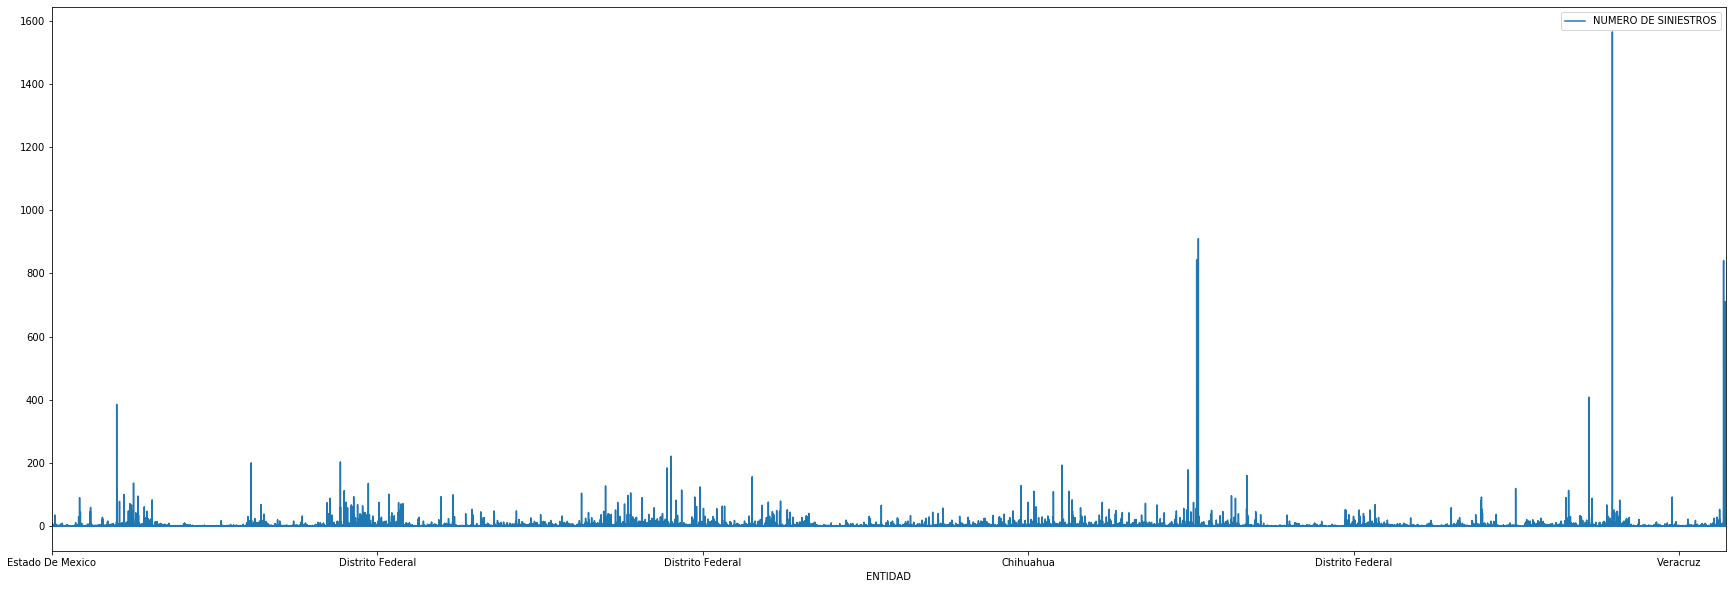

In [44]:
dirtydata.plot("ENTIDAD", "NUMERO DE SINIESTROS", figsize=(30,10))

# 5.- Export data to use it on Tableau.

In [46]:
dirtydata.to_csv("cleanfire2020.csv", index=False)